In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./titanic/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
from sklearn.preprocessing import OneHotEncoder
# do on ehot encoding on embarked and sex columns
# Create a new DataFrame containing only the categorical columns you want to one-hot encode
categorical_df = df[["Gender"]]

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit the encoder to the categorical data and transform it
categorical_encoded = encoder.fit_transform(categorical_df).toarray()

# Create a new DataFrame with the one-hot encoded features
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(input_features=categorical_df.columns))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
encoded_df = pd.concat([df, categorical_encoded_df], axis=1)

# Drop the original categorical columns
encoded_df.drop(["Gender"], axis=1, inplace=True)

In [7]:
encoded_df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0.0,1.0
1,2,21,15,81,0.0,1.0
2,3,20,16,6,1.0,0.0
3,4,23,16,77,1.0,0.0
4,5,31,17,40,1.0,0.0
...,...,...,...,...,...,...
195,196,35,120,79,1.0,0.0
196,197,45,126,28,1.0,0.0
197,198,32,126,74,0.0,1.0
198,199,32,137,18,0.0,1.0


Univariate analysis involves examining a single variable at a time to understand its characteristics, distribution, and behavior. In the context of customer segmentation in a mall, you can perform univariate analysis on various customer-related variables to gain insights for segmentation. Here are some common ways to conduct univariate analysis on mall data for customer segmentation:

1. **Descriptive Statistics:** Calculate basic statistics such as mean, median, mode, standard deviation, and range for variables like age, income, and spending behavior. This will give you an overview of the central tendency and variability of these attributes.

2. **Frequency Distributions:** Create frequency distributions or histograms for categorical variables such as gender, marital status, and product preferences. This will help you understand the distribution of customers across different categories.

3. **Box Plots:** Use box plots to visualize the distribution of numerical variables and identify outliers. For example, you can create a box plot for annual spending to see if there are customers with exceptionally high or low spending habits.

4. **Bar Charts:** Generate bar charts to represent the frequency or proportion of customers falling into different categories. This can be useful for visualizing variables like product preferences or membership status.

5. **Pie Charts:** Create pie charts to show the composition of customer segments in terms of proportions. This can be helpful for visualizing the distribution of customers across different categories, like age groups or gender.

6. **Measures of Central Tendency:** Calculate the mean, median, and mode for variables like age and income to understand the typical or most common values.

7. **Measures of Spread:** Analyze the range and standard deviation of variables to assess the variability within customer attributes such as income or spending behavior.

8. **Percentiles:** Use percentiles to identify specific points in the distribution. For example, you can determine the 25th, 50th, and 75th percentiles for age to understand the age ranges of different customer segments.

9. **Count and Proportion Analysis:** Determine the count and proportion of customers in specific categories or segments. For example, you can calculate the percentage of customers who are members of loyalty programs.

10. **Time-Series Analysis:** If you have data over time, you can use time-series univariate analysis to identify trends and seasonality in customer behavior, such as peak shopping seasons or recurring sales events.

11. **Customer Profiling:** Create customer profiles based on demographics, psychographics, or other relevant attributes. For example, group customers by age, income level, or spending habits to create distinct customer segments.

12. **Segmentation Based on Single Variables:** You can also perform simple segmentation by dividing customers into distinct groups based on a single variable. For example, segmenting customers by age groups (e.g., young, middle-aged, and elderly) or income levels (e.g., low, medium, and high income).

Univariate analysis provides a foundation for understanding customer characteristics and behavior, which can serve as a starting point for more advanced multivariate analysis and customer segmentation techniques. Once you have insights from univariate analysis, you can explore more sophisticated methods like clustering, decision trees, or regression analysis to create meaningful customer segments for marketing and business strategies.

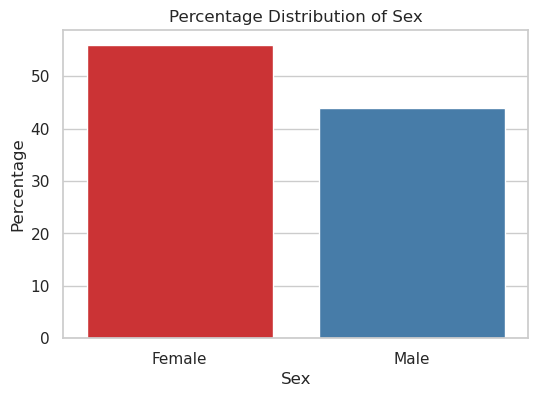

In [8]:
#univariate analysis
# 1. bar chart for the customers based on their gender

sex_percentages = df["Gender"].value_counts(normalize=True) * 100

# Create a bar chart for the percentage distribution of "Sex" against "Survived"
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

# Use Seaborn's barplot to create the bar chart
sns.barplot(x=sex_percentages.index, y=sex_percentages.values, palette="Set1")

# Add labels and title
plt.xlabel("Sex")
plt.ylabel("Percentage")
plt.title("Percentage Distribution of Sex")

# Show the plot
plt.show()


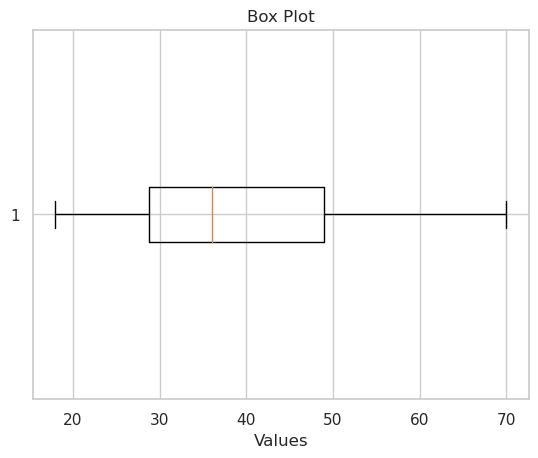

In [9]:
import matplotlib.pyplot as plt

# Sample data (replace this with your own dataset)
data = df["Age"]

# Create a box plot
plt.boxplot(data, vert=False)  # vert=False for a horizontal box plot
plt.title("Box Plot")
plt.xlabel("Values")

plt.show()


In [10]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

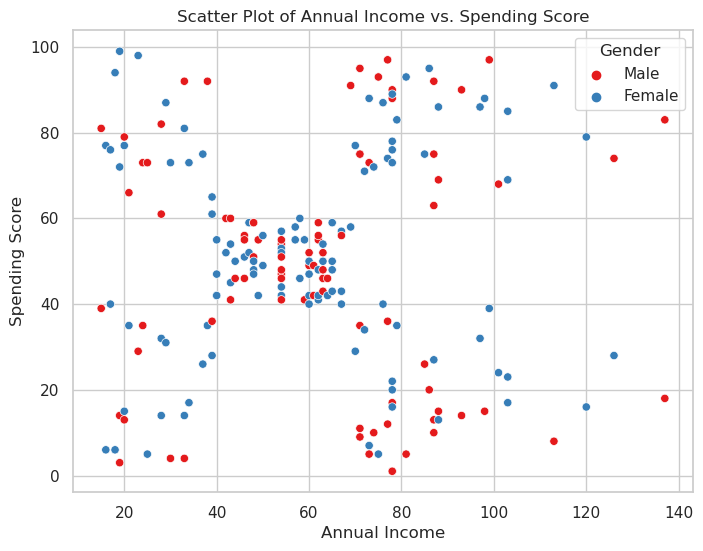

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Create a scatter plot with different colors for each gender
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Annual Income (k$)", y='Spending Score (1-100)', data=df, hue="Gender", palette="Set1")

plt.title("Scatter Plot of Annual Income vs. Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend(title="Gender")

plt.show()



In [12]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


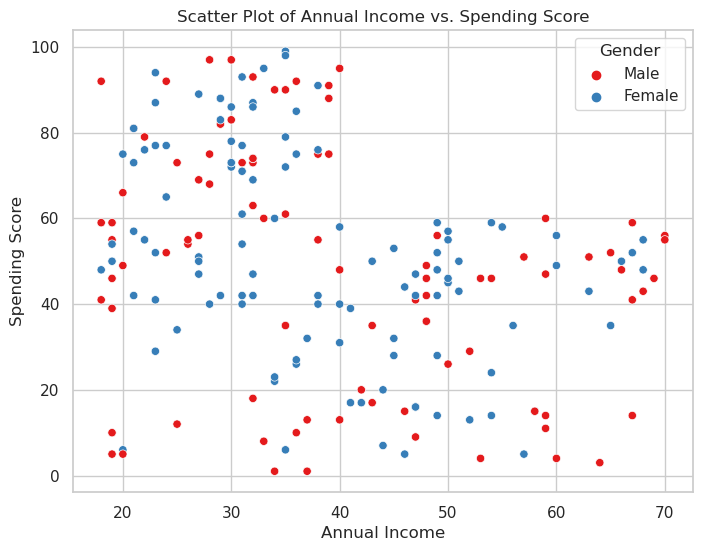

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Create a scatter plot with different colors for each gender
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Age", y='Spending Score (1-100)', data=df, hue="Gender", palette="Set1")

plt.title("Scatter Plot of Annual Income vs. Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend(title="Gender")

plt.show()

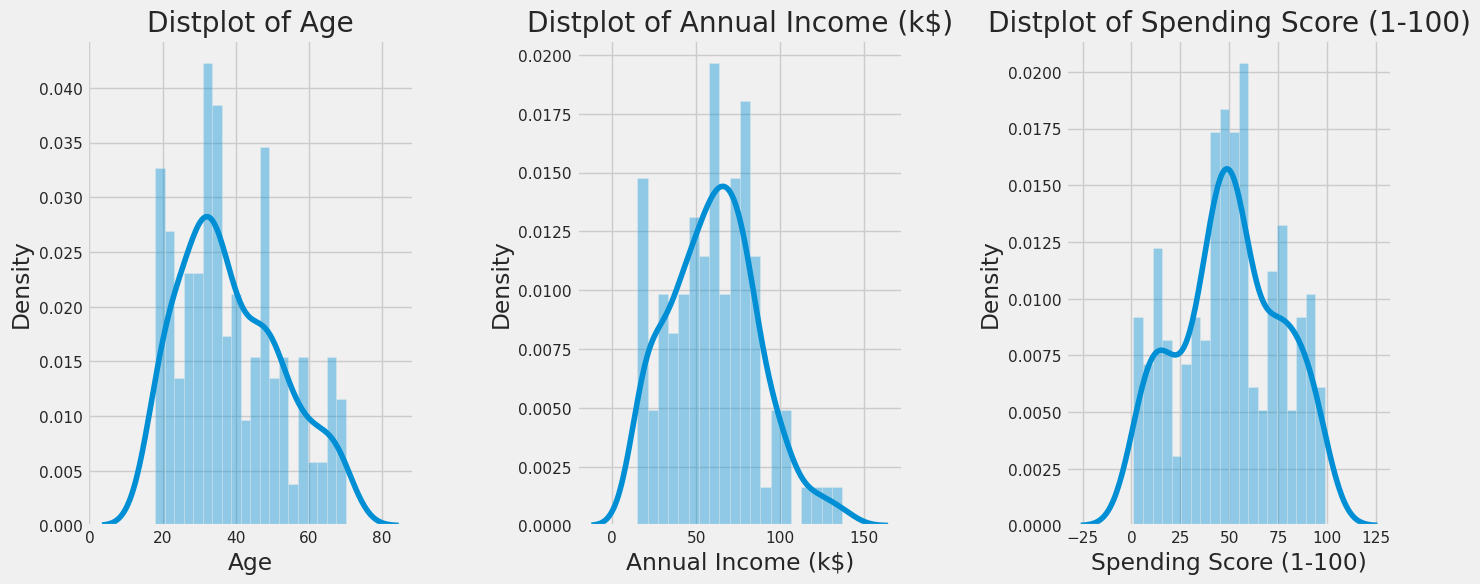

In [14]:


plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()


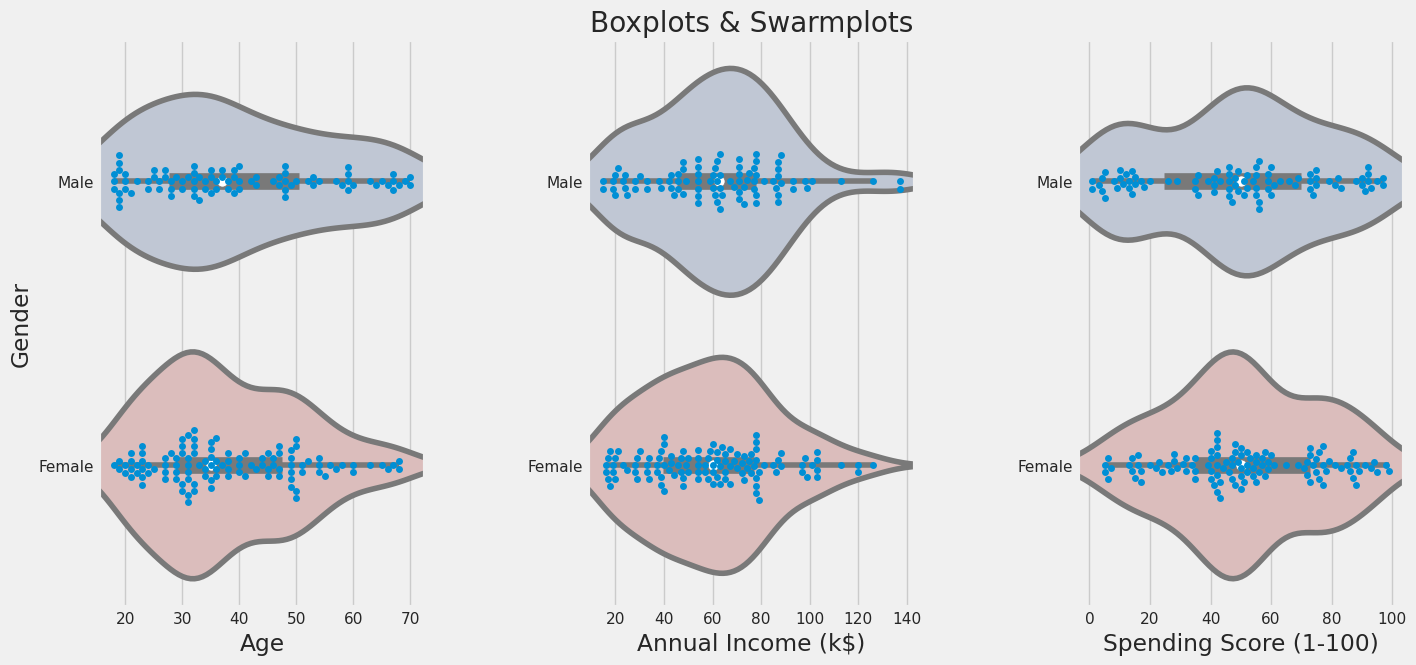

In [15]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

In [16]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

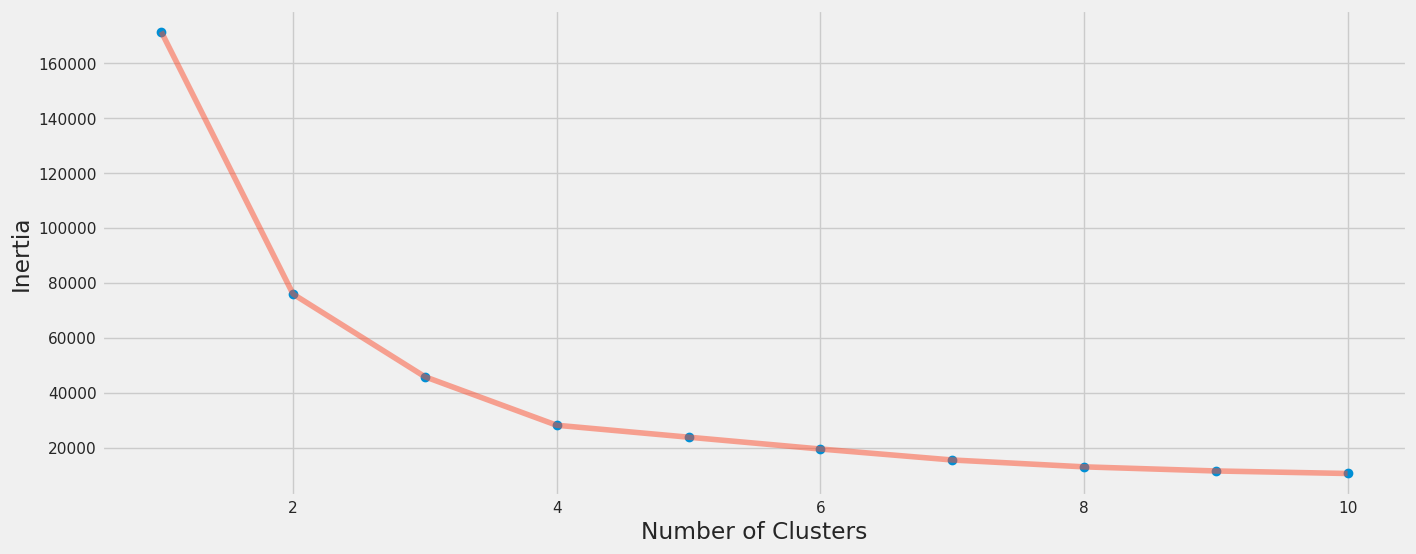

In [17]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [18]:
df.shape

(200, 5)

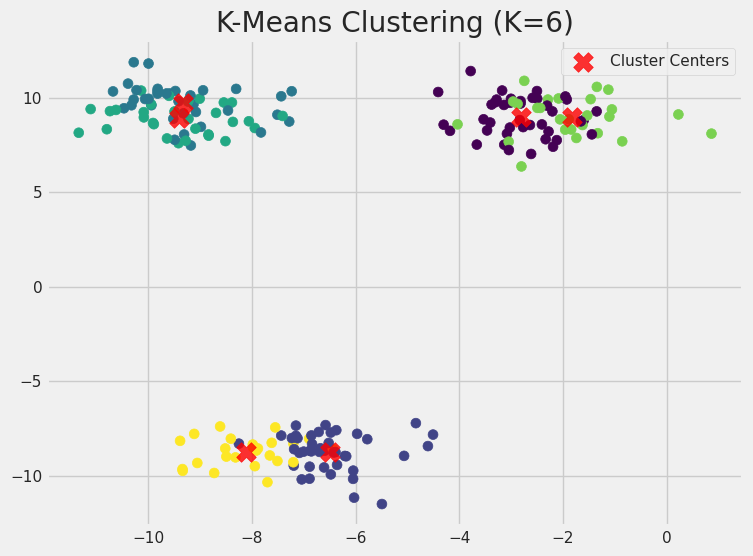

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV

# Create sample data
n_samples = df.shape[0]
n_features = df.shape[1]
n_clusters = 3
random_state = 42

X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Perform K-Means clustering with GridSearchCV to find the best number of clusters (K)
param_grid = {'n_clusters': [2, 3, 4, 5, 6]}
kmeans = KMeans()
grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(X)

# Get the best number of clusters (K) from the grid search
best_n_clusters = grid_search.best_params_['n_clusters']

# Fit K-Means with the best K
kmeans = KMeans(n_clusters=best_n_clusters)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8, marker='X', label='Cluster Centers')
plt.title(f'K-Means Clustering (K={best_n_clusters})')
plt.legend()
plt.show()


In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


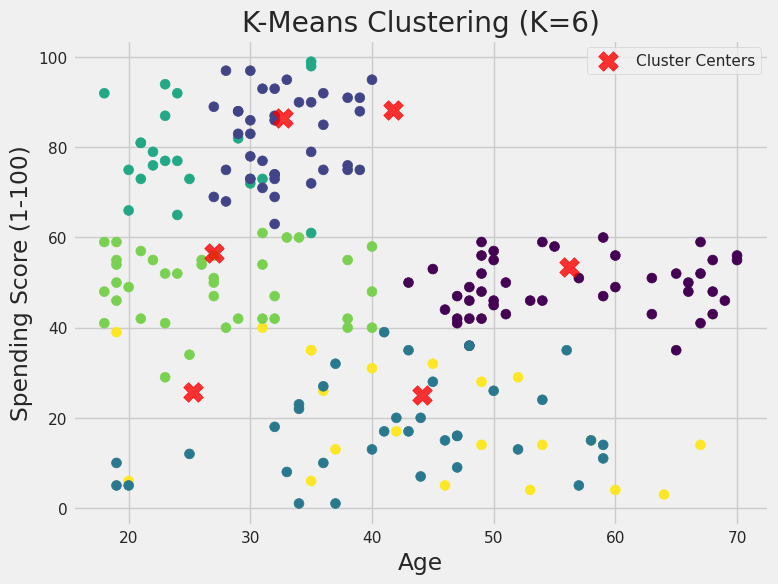

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

# Select the features you want to use for clustering
features = df[['Age', 'Annual Income (k$)','Spending Score (1-100)']]

# Define the range of possible cluster numbers (K) for GridSearchCV
param_grid = {'n_clusters': [2, 3, 4, 5, 6]}

# Create the K-Means model
kmeans = KMeans()
grid_search = GridSearchCV(kmeans, param_grid, cv=5)

# Fit the model and find the best number of clusters (K)
grid_search.fit(features)

# Get the best number of clusters (K) from the grid search
best_n_clusters = grid_search.best_params_['n_clusters']

# Fit K-Means with the best K
kmeans = KMeans(n_clusters=best_n_clusters)
kmeans.fit(features)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(features['Age'], features['Spending Score (1-100)'], c=labels, cmap='viridis', marker='o', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8, marker='X', label='Cluster Centers')
plt.title(f'K-Means Clustering (K={best_n_clusters})')
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


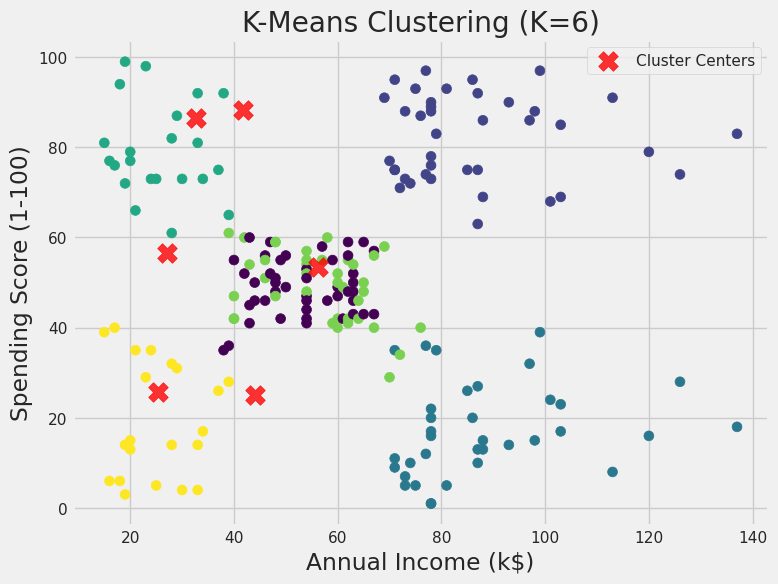

In [22]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(features['Annual Income (k$)'], features['Spending Score (1-100)'], c=labels, cmap='viridis', marker='o', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8, marker='X', label='Cluster Centers')
plt.title(f'K-Means Clustering (K={best_n_clusters})')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()